In [1]:
# imported dependencies
import pennylane as qml
from itertools import product
import numpy as np
import random
from collections import defaultdict

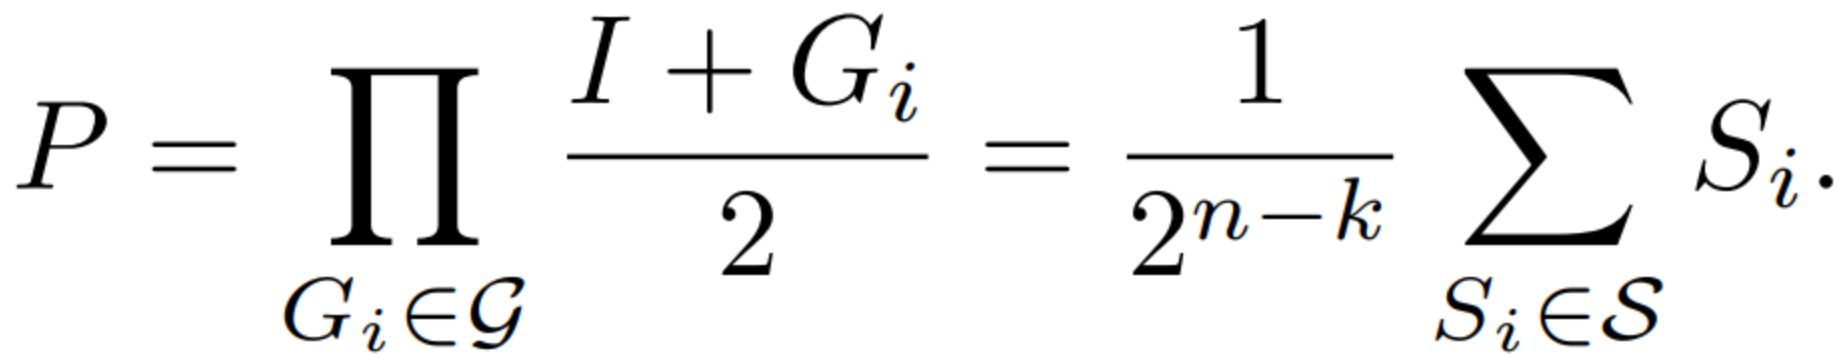

In [2]:
# Verify that the projector P can be calculated both ways

G1 = qml.Identity(0) @ qml.PauliZ(1) @ qml.PauliZ(2)
G2 = qml.PauliZ(0) @ qml.PauliZ(1) @ qml.Identity(2)

G1 = G1.matrix()
G2 = G2.matrix()

# S size of 4 (Assuming generators that we chose should be able to make up the set of S)
I = qml.Identity(0) @ qml.Identity(1) @ qml.Identity(2)
I = I.matrix()

G = [G1, G2]
S = [G1, G2, G1 @ G2, I]


# Assume all G are same size
def calculate_P_with_G(G):
    # G1 and G2 are diagonal matrix so the eigenvalues are just the values of the diagonal
    # Furthermore, the values are only +/- 1
    # If we add the identity matrix then the eigenvalues become 0 and 2
    # If we divide by 2 all eigenvalues become only 0 or 1
    I = np.eye(G[0].shape[0])
    P = np.eye(G[0].shape[0])
    for g in G:
        P = P @ (I + g)/2
    return P

def calculate_P_with_S(S):
    P = np.zeros(S[0].shape)
    for elem in S:
        P += elem
    # Same reasoning above, have to divide to get eigenvalue back to 0 or 1 
    P *= 1/(len(S))
    return P
        
P1 = calculate_P_with_G(G)
P2 = calculate_P_with_S(S)
print(np.allclose(P1,P2))

True


In [4]:
# Verifies the state vectors in our eigenstates
def find_unique_eigenstates(stabilizers):
    eigenvectors = defaultdict(set)
    for i,stabilizer in enumerate(stabilizers):
        eigvals, eigvecs = np.linalg.eig(stabilizer)
        for j in range(len(eigvals)):
            if np.isclose(eigvals[j], 1):
                eigenvectors[i].add(tuple(eigvecs[:,j]))

    sets_of_arrays = list(eigenvectors.values())
    common_arrays = set.intersection(*sets_of_arrays)
    return common_arrays
# This should return the 0 and 1 state because they are the eigenvectors with eigenvalues 1 
# that are present in all of our stabilizers
find_unique_eigenstates(S)


{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0),
 (1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)}